In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import momlevel as ml
import gcsfs
import zarr

In [2]:
def south_pole_map(cols=1, rows=1, fig_size=(12,8), max_extent=-50, facecolor='white'):
    ''' 
    User note: In order to call the function, begin cell with: fig, ax = south_pole_map(**args).
    
    Neglecting "fig, ax =" at the begeinning will not map your data to the existing axes.
    
    This function sets up a polar projection centered at the South Pole, which DataArrays can be plotted over.
    
    Optional arguments accepted for figure size, maximum (northward) extent and facecolor. Any number of columns and/or rows are also accepted for multiple subplots.
    
    If creating multiple subplots, ax=ax[*index*] must be passed in the plot call for each array.
    
    By default, these are set to (12,8), -50ºS and gray, respectively. Columns/Rows set to 1 by default – specifying axes in which to plot data is not necessary when using default column number.
    '''
    import matplotlib.path as mpath
    import numpy as np
    import cartopy.crs as ccrs
    
    fig,ax = plt.subplots(figsize=fig_size, ncols=cols, nrows=rows, subplot_kw={'projection': ccrs.SouthPolarStereo(), 'facecolor':facecolor}, layout='constrained')

    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    
    if rows>1 and cols>1:
        for i in range(rows):
            for j in range(cols):
                ax[i,j].set_boundary(circle, transform=ax[i,j].transAxes)

                # lat/long map extents. shows south pole out to 50ºS
                ax[i,j].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif cols>1 and rows==1:
        for i in range(cols):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    elif rows>1 and cols==1:
        for i in range(rows):
            ax[i].set_boundary(circle, transform=ax[i].transAxes)

            # lat/long map extents. shows south pole out to 50ºS
            ax[i].set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    else:
        ax.set_boundary(circle, transform=ax.transAxes)

            # lat/long map extents. shows south pole out to 50ºS
        ax.set_extent([-180, 180, -90, max_extent], ccrs.PlateCarree())
    
    
    #must return fig, ax when creating multiple subplots in a function
    return fig, ax

In [3]:
mask_CM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/CM4_mask_antarctica.nc')
mask_ESM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/ESM4_mask_antarctica.nc')

In [4]:
temperature_pi_ESM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_esm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

temperature_pi_CM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_cm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)



In [5]:
temp_CM4 = temperature_pi_CM4.temp
temp_ESM4 = temperature_pi_ESM4.temp

In [9]:
temp_climatology = ml.util.annual_cycle(temp_CM4,tcoord='time')

In [10]:
temp_seasonal = temp_CM4.groupby('time.season').mean(dim='time')
temp_summer= temp_seasonal.sel(season= 'DJF')
temp_winter=temp_seasonal.sel(season='JJA')
temp_spring=temp_seasonal.sel(season='SON')
temp_fall=temp_seasonal.sel(season='MAM')

In [11]:
plateau_temp_summer=(temp_summer*(mask_CM4.plateau_CM4)).mean(dim='pfull')
ross_temp_summer=(temp_summer*(mask_CM4.ross_CM4)).mean(dim='pfull')
lowwest_temp_summer=(temp_summer*(mask_CM4.lowwest_CM4)).mean(dim='pfull')
loweast_temp_summer=(temp_summer*(mask_CM4.loweast_CM4)).mean(dim='pfull')
filchner_temp_summer=(temp_summer*(mask_CM4.filchner_CM4)).mean(dim='pfull')
peninsula_temp_summer=(temp_summer*(mask_CM4.peninsula_CM4)).mean(dim='pfull')

In [12]:
plateau_temp_winter=(temp_winter*(mask_CM4.plateau_CM4)).mean(dim='pfull')
ross_temp_winter=(temp_winter*(mask_CM4.ross_CM4)).mean(dim='pfull')
lowwest_temp_winter=(temp_winter*(mask_CM4.lowwest_CM4)).mean(dim='pfull')
loweast_temp_winter=(temp_winter*(mask_CM4.loweast_CM4)).mean(dim='pfull')
filchner_temp_winter=(temp_winter*(mask_CM4.filchner_CM4)).mean(dim='pfull')
peninsula_temp_winter=(temp_winter*(mask_CM4.peninsula_CM4)).mean(dim='pfull')

In [13]:
plateau_temp_spring=(temp_spring*(mask_CM4.plateau_CM4)).mean(dim='pfull')
ross_temp_spring=(temp_spring*(mask_CM4.ross_CM4)).mean(dim='pfull')
lowwest_temp_spring=(temp_spring*(mask_CM4.lowwest_CM4)).mean(dim='pfull')
loweast_temp_spring=(temp_spring*(mask_CM4.loweast_CM4)).mean(dim='pfull')
filchner_temp_spring=(temp_spring*(mask_CM4.filchner_CM4)).mean(dim='pfull')
peninsula_temp_spring=(temp_spring*(mask_CM4.peninsula_CM4)).mean(dim='pfull')

In [14]:
plateau_temp_fall=(temp_fall*(mask_CM4.plateau_CM4)).mean(dim='pfull')
ross_temp_fall=(temp_spring*(mask_CM4.ross_CM4)).mean(dim='pfull')
lowwest_temp_fall=(temp_fall*(mask_CM4.lowwest_CM4)).mean(dim='pfull')
loweast_temp_fall=(temp_fall*(mask_CM4.loweast_CM4)).mean(dim='pfull')
filchner_temp_fall=(temp_fall*(mask_CM4.filchner_CM4)).mean(dim='pfull')
peninsula_temp_fall=(temp_fall*(mask_CM4.peninsula_CM4)).mean(dim='pfull')

Text(0.5, 0.98, 'Temperature for Fall (Kelvin)')

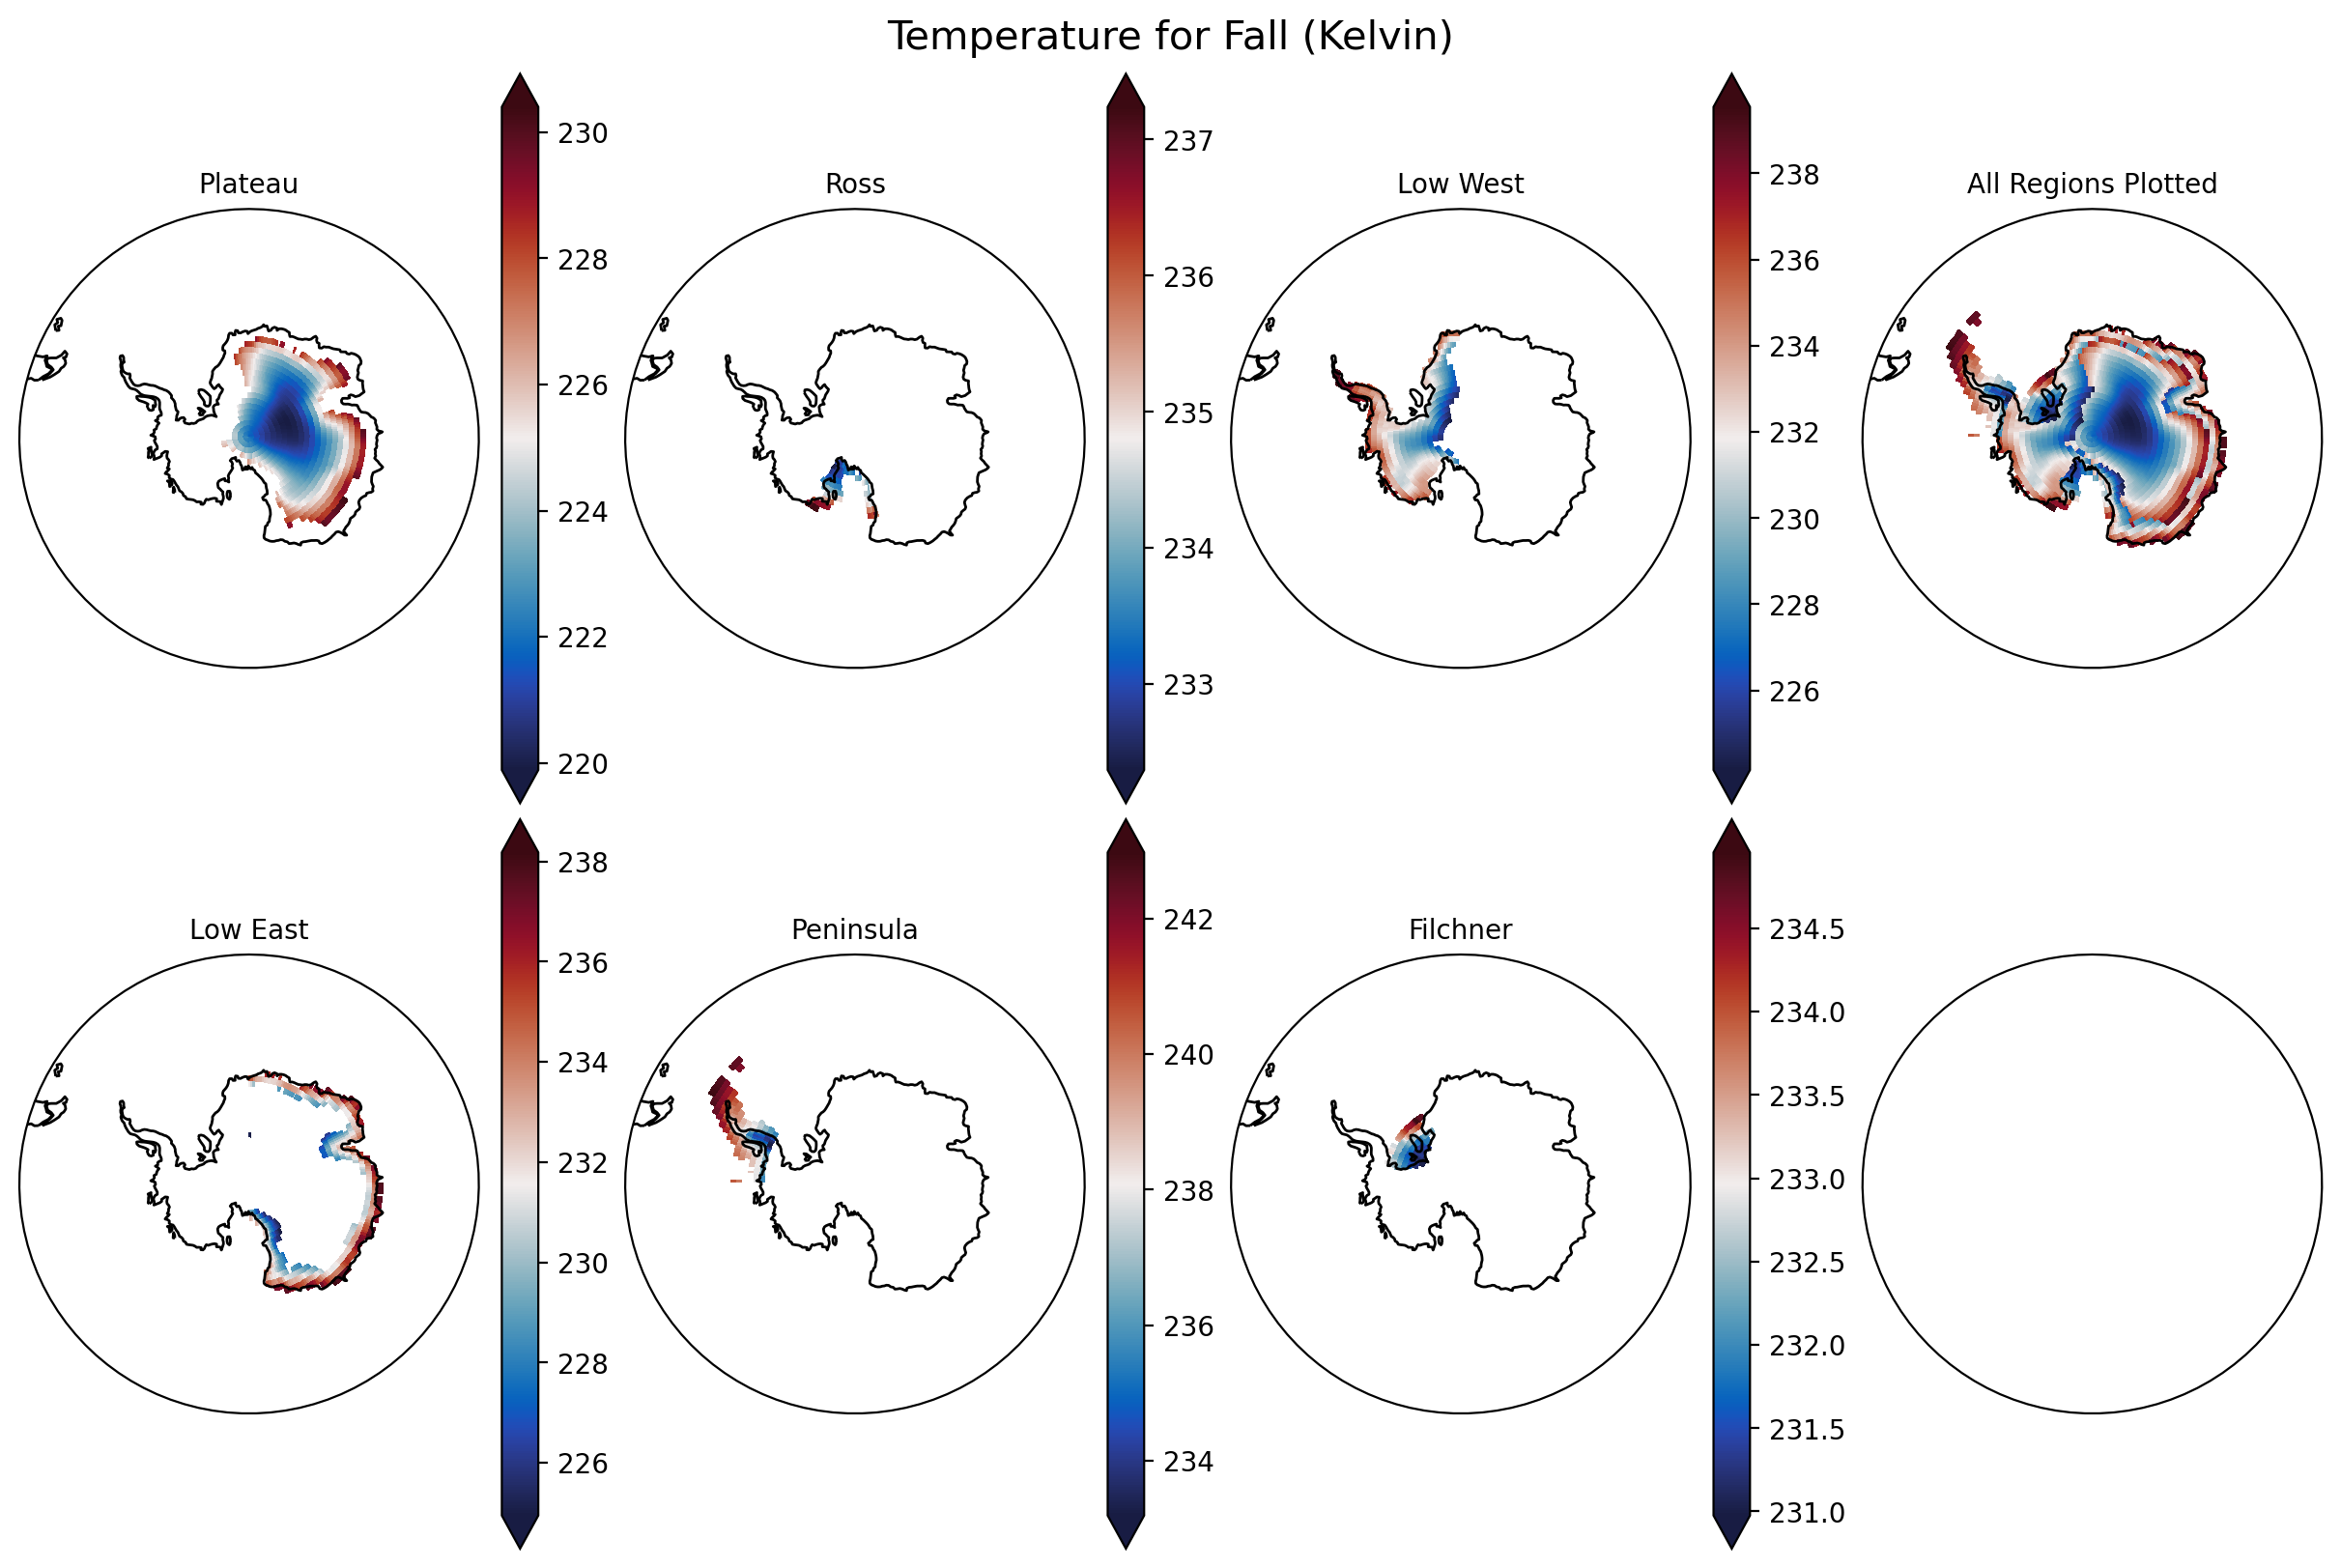

In [15]:
fig, ax = south_pole_map(cols=4, rows=2,fig_size=(12,8))


plateau_temp_fall.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
    
ross_temp_fall.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
             
              extend='both',
              cmap=cmocean.cm.balance)
lowwest_temp_fall.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance)
    
loweast_temp_fall.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              
               extend='both',
               cmap= cmocean.cm.balance)
peninsula_temp_fall.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
filchner_temp_fall.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
plateau_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance, add_colorbar=False)

ross_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)


lowwest_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)

loweast_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)

filchner_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
                
               cmap=cmocean.cm.balance, add_colorbar=False)

peninsula_temp_fall.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)



ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()
ax[0,3].coastlines()

ax[0,0].set_title('Plateau',size=10)
ax[0,1].set_title('Ross',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Low East',size=10)
ax[1,1].set_title('Peninsula',size=10)
ax[1,2].set_title('Filchner',size=10)
ax[0,3].set_title('All Regions Plotted',size=10)


fig.suptitle('Temperature for Fall (Kelvin)', fontsize=15)

Text(0.5, 0.98, 'Temperature for Spring (Kelvin)')

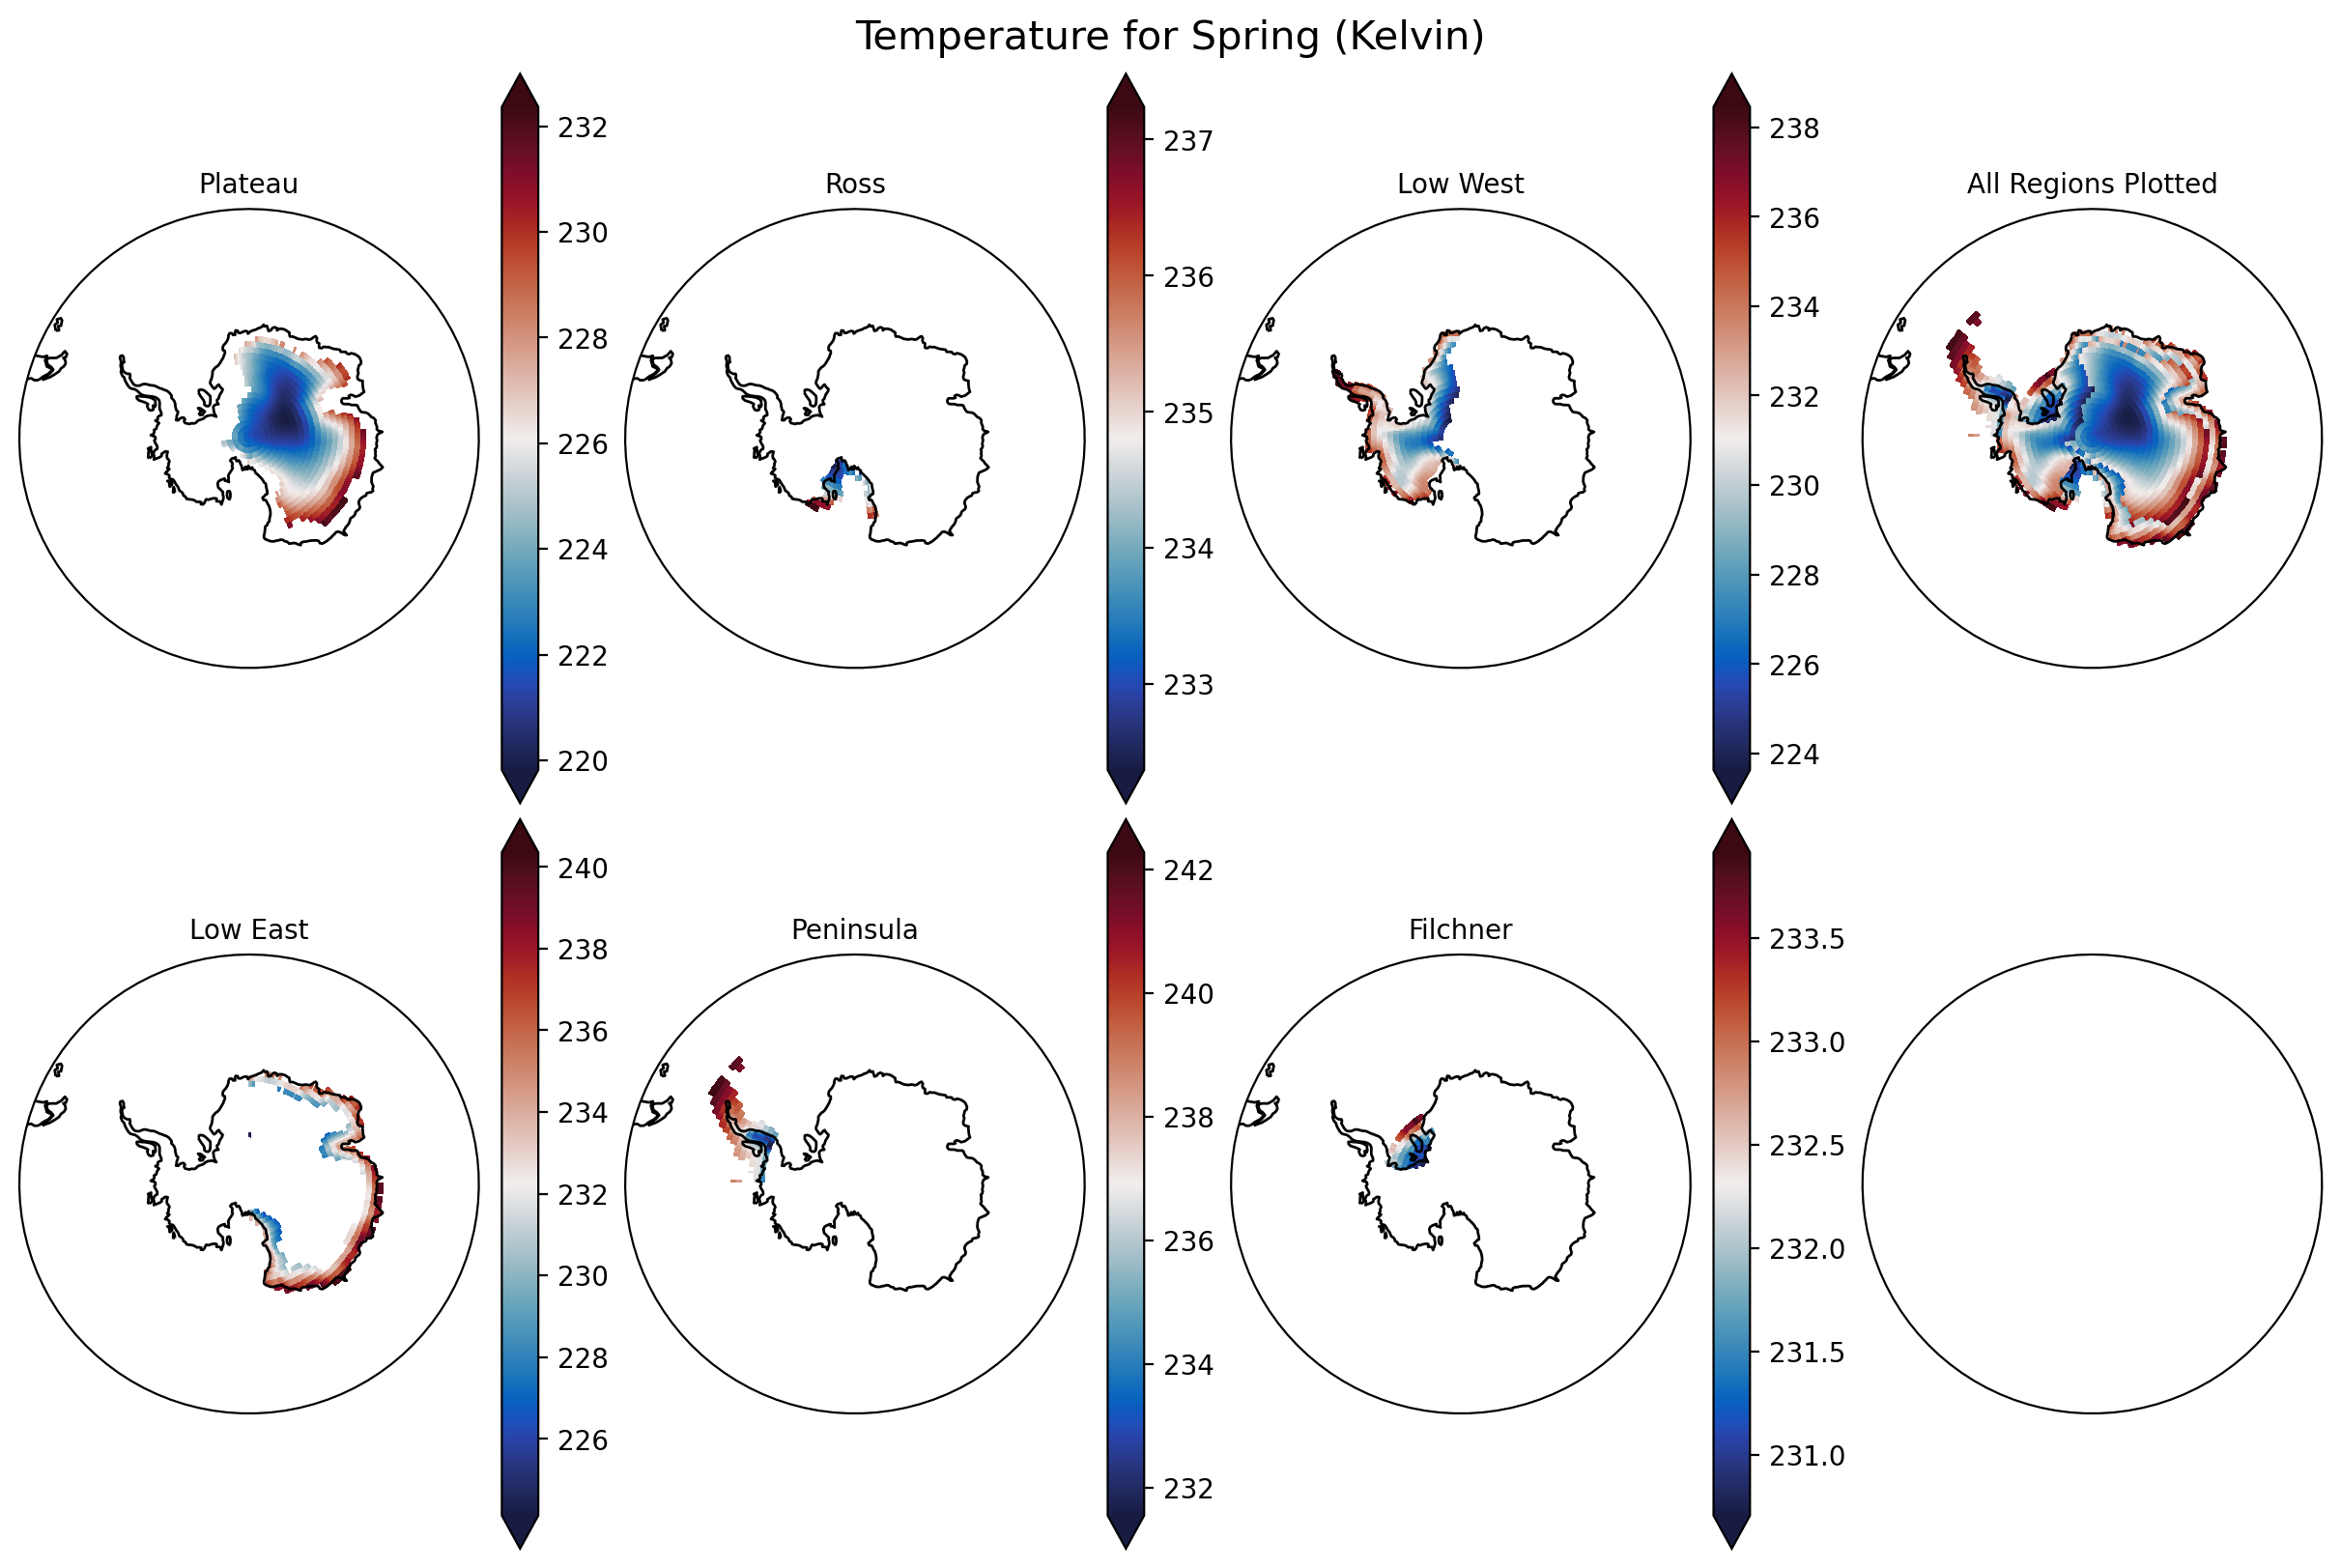

In [16]:
fig, ax = south_pole_map(cols=4, rows=2,fig_size=(12,8))


plateau_temp_spring.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
    
ross_temp_spring.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
             
              extend='both',
              cmap=cmocean.cm.balance)
lowwest_temp_spring.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance)
    
loweast_temp_spring.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              
               extend='both',
               cmap= cmocean.cm.balance)
peninsula_temp_spring.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
filchner_temp_spring.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
plateau_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance, add_colorbar=False)

ross_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)


lowwest_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)

loweast_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)

filchner_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
                
               cmap=cmocean.cm.balance, add_colorbar=False)

peninsula_temp_spring.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)



ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()
ax[0,3].coastlines()

ax[0,0].set_title('Plateau',size=10)
ax[0,1].set_title('Ross',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Low East',size=10)
ax[1,1].set_title('Peninsula',size=10)
ax[1,2].set_title('Filchner',size=10)
ax[0,3].set_title('All Regions Plotted',size=10)


fig.suptitle('Temperature for Spring (Kelvin)', fontsize=15)

Text(0.5, 0.98, 'Temperature for Summer (Kelvin)')

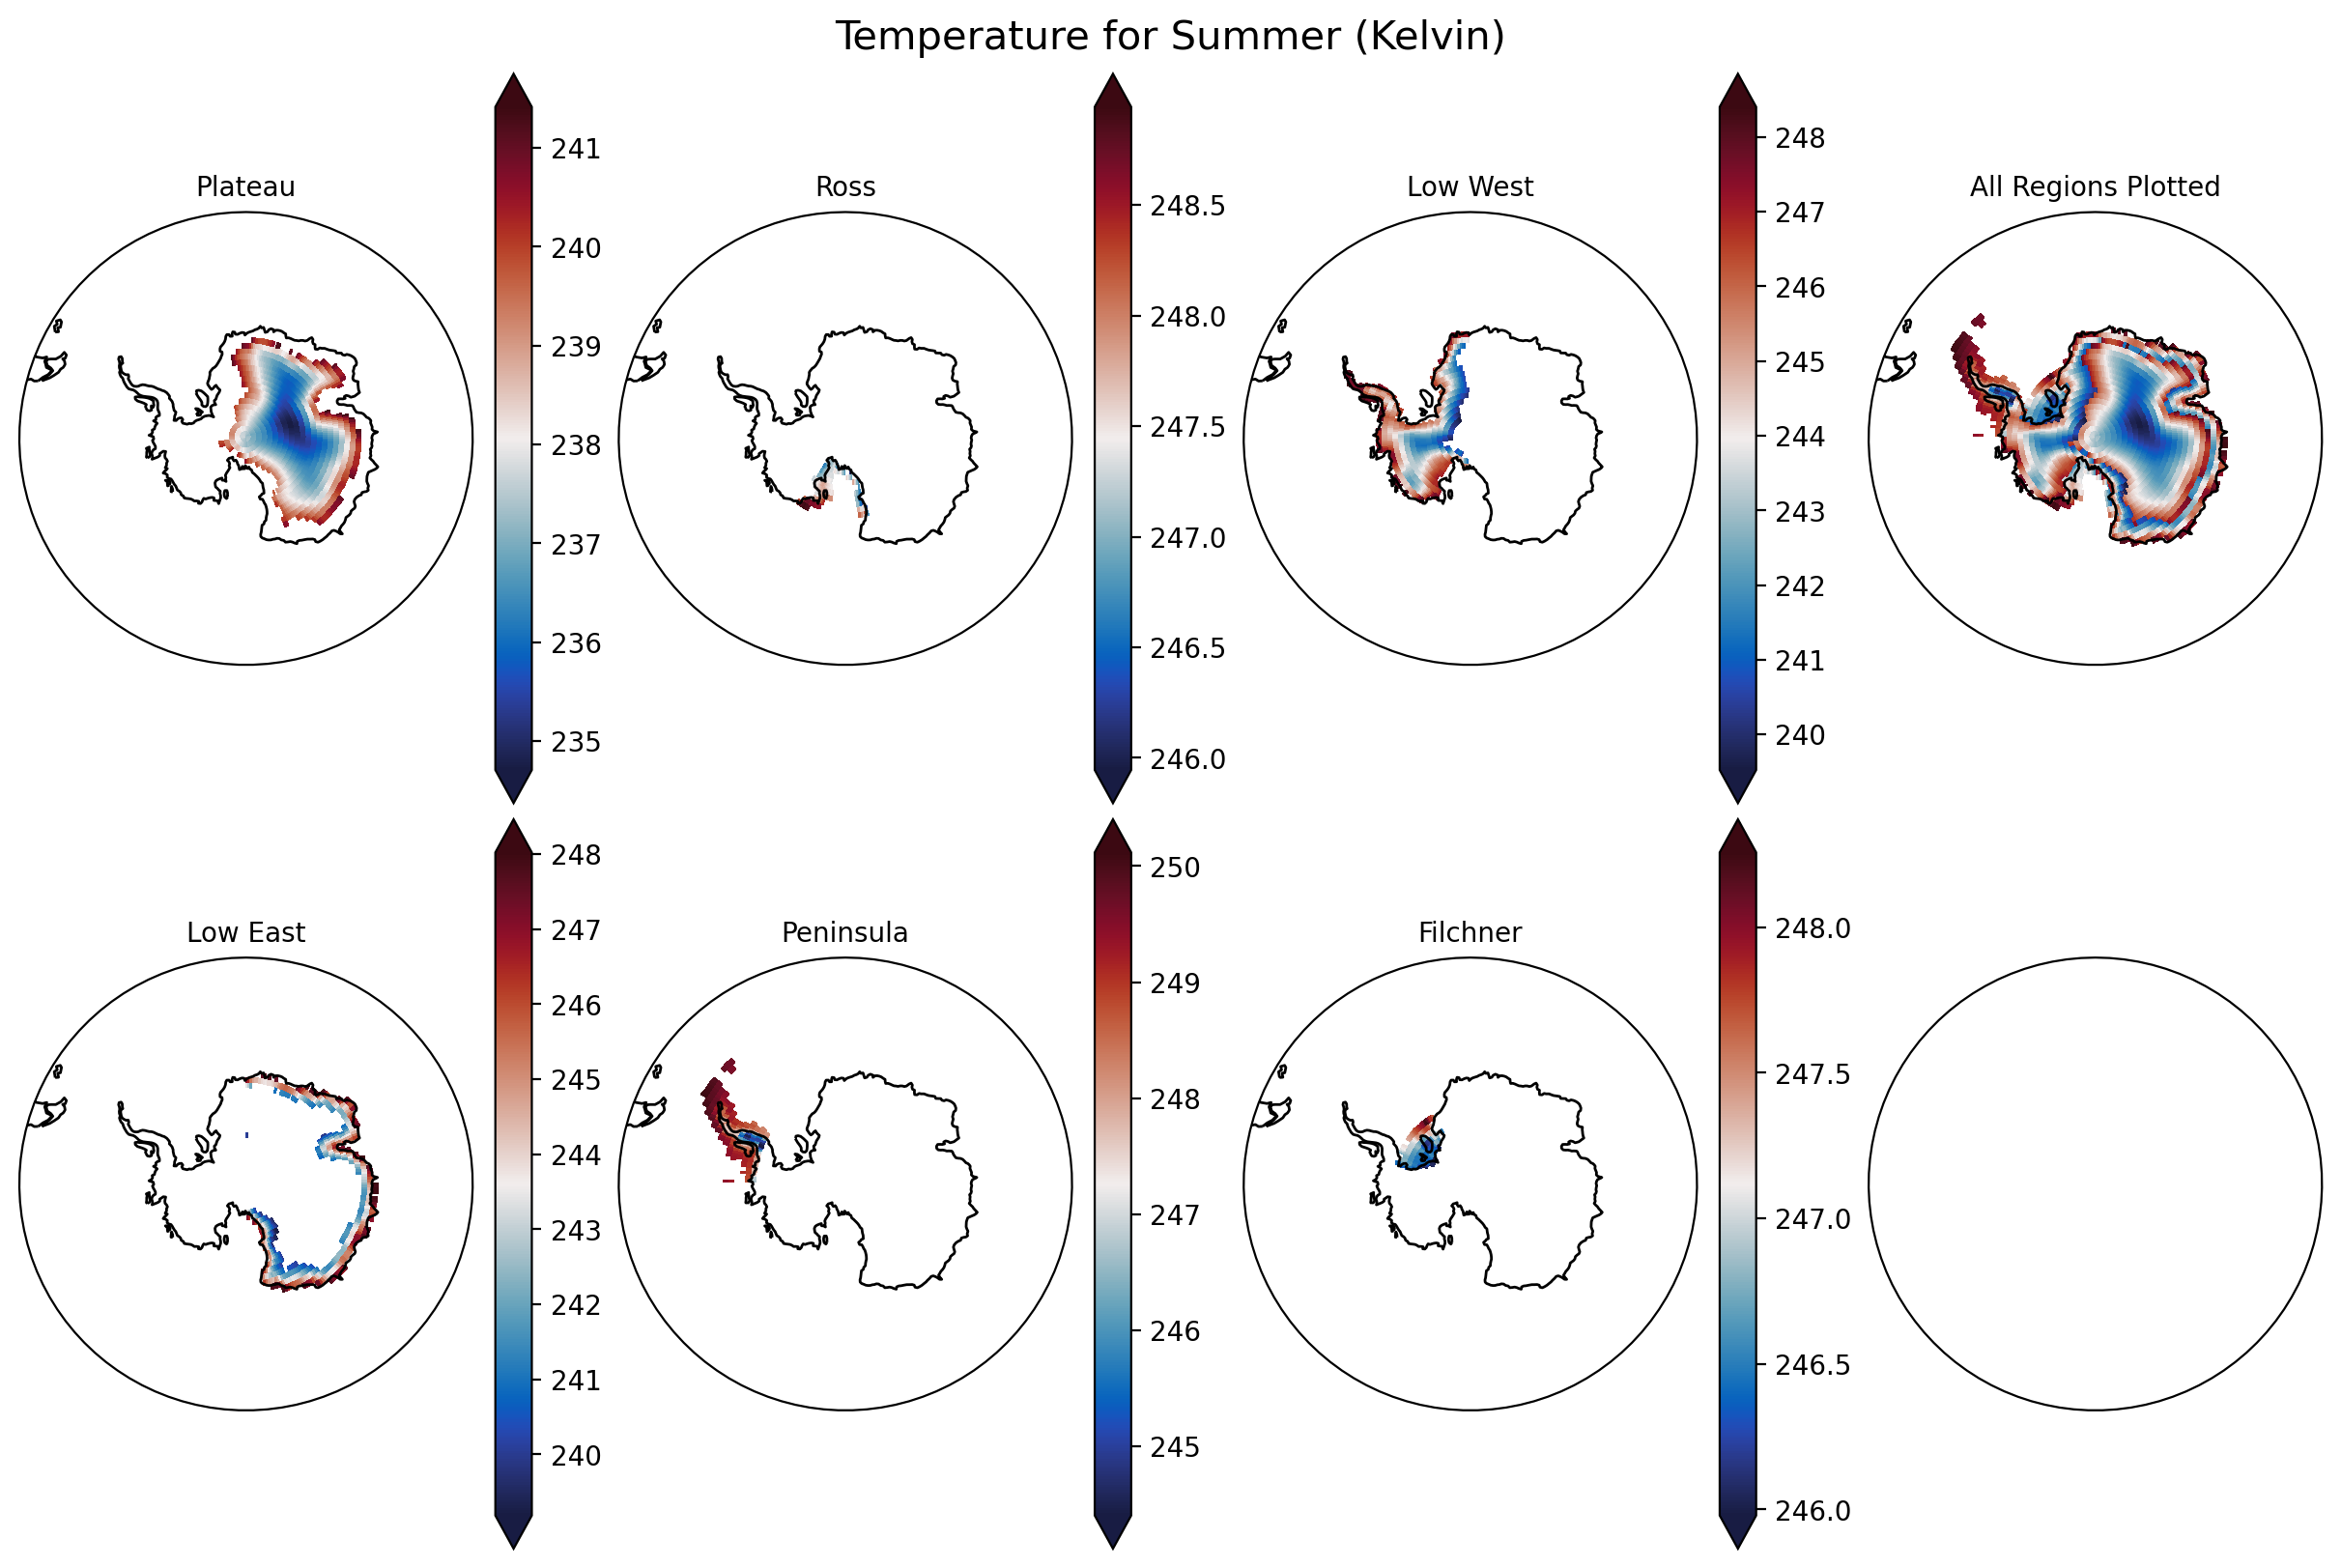

In [17]:
fig, ax = south_pole_map(cols=4, rows=2,fig_size=(12,8))


plateau_temp_summer.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
    
ross_temp_summer.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
             
              extend='both',
              cmap=cmocean.cm.balance)
lowwest_temp_summer.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance)
    
loweast_temp_summer.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              
               extend='both',
               cmap= cmocean.cm.balance)
peninsula_temp_summer.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
filchner_temp_summer.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
plateau_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance, add_colorbar=False)

ross_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)


lowwest_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)

loweast_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)

filchner_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
                
               cmap=cmocean.cm.balance, add_colorbar=False)

peninsula_temp_summer.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)



ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()
ax[0,3].coastlines()

ax[0,0].set_title('Plateau',size=10)
ax[0,1].set_title('Ross',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Low East',size=10)
ax[1,1].set_title('Peninsula',size=10)
ax[1,2].set_title('Filchner',size=10)
ax[0,3].set_title('All Regions Plotted',size=10)


fig.suptitle('Temperature for Summer (Kelvin)', fontsize=15)

Text(0.5, 0.98, 'Temperature for Winter (Kelvin)')

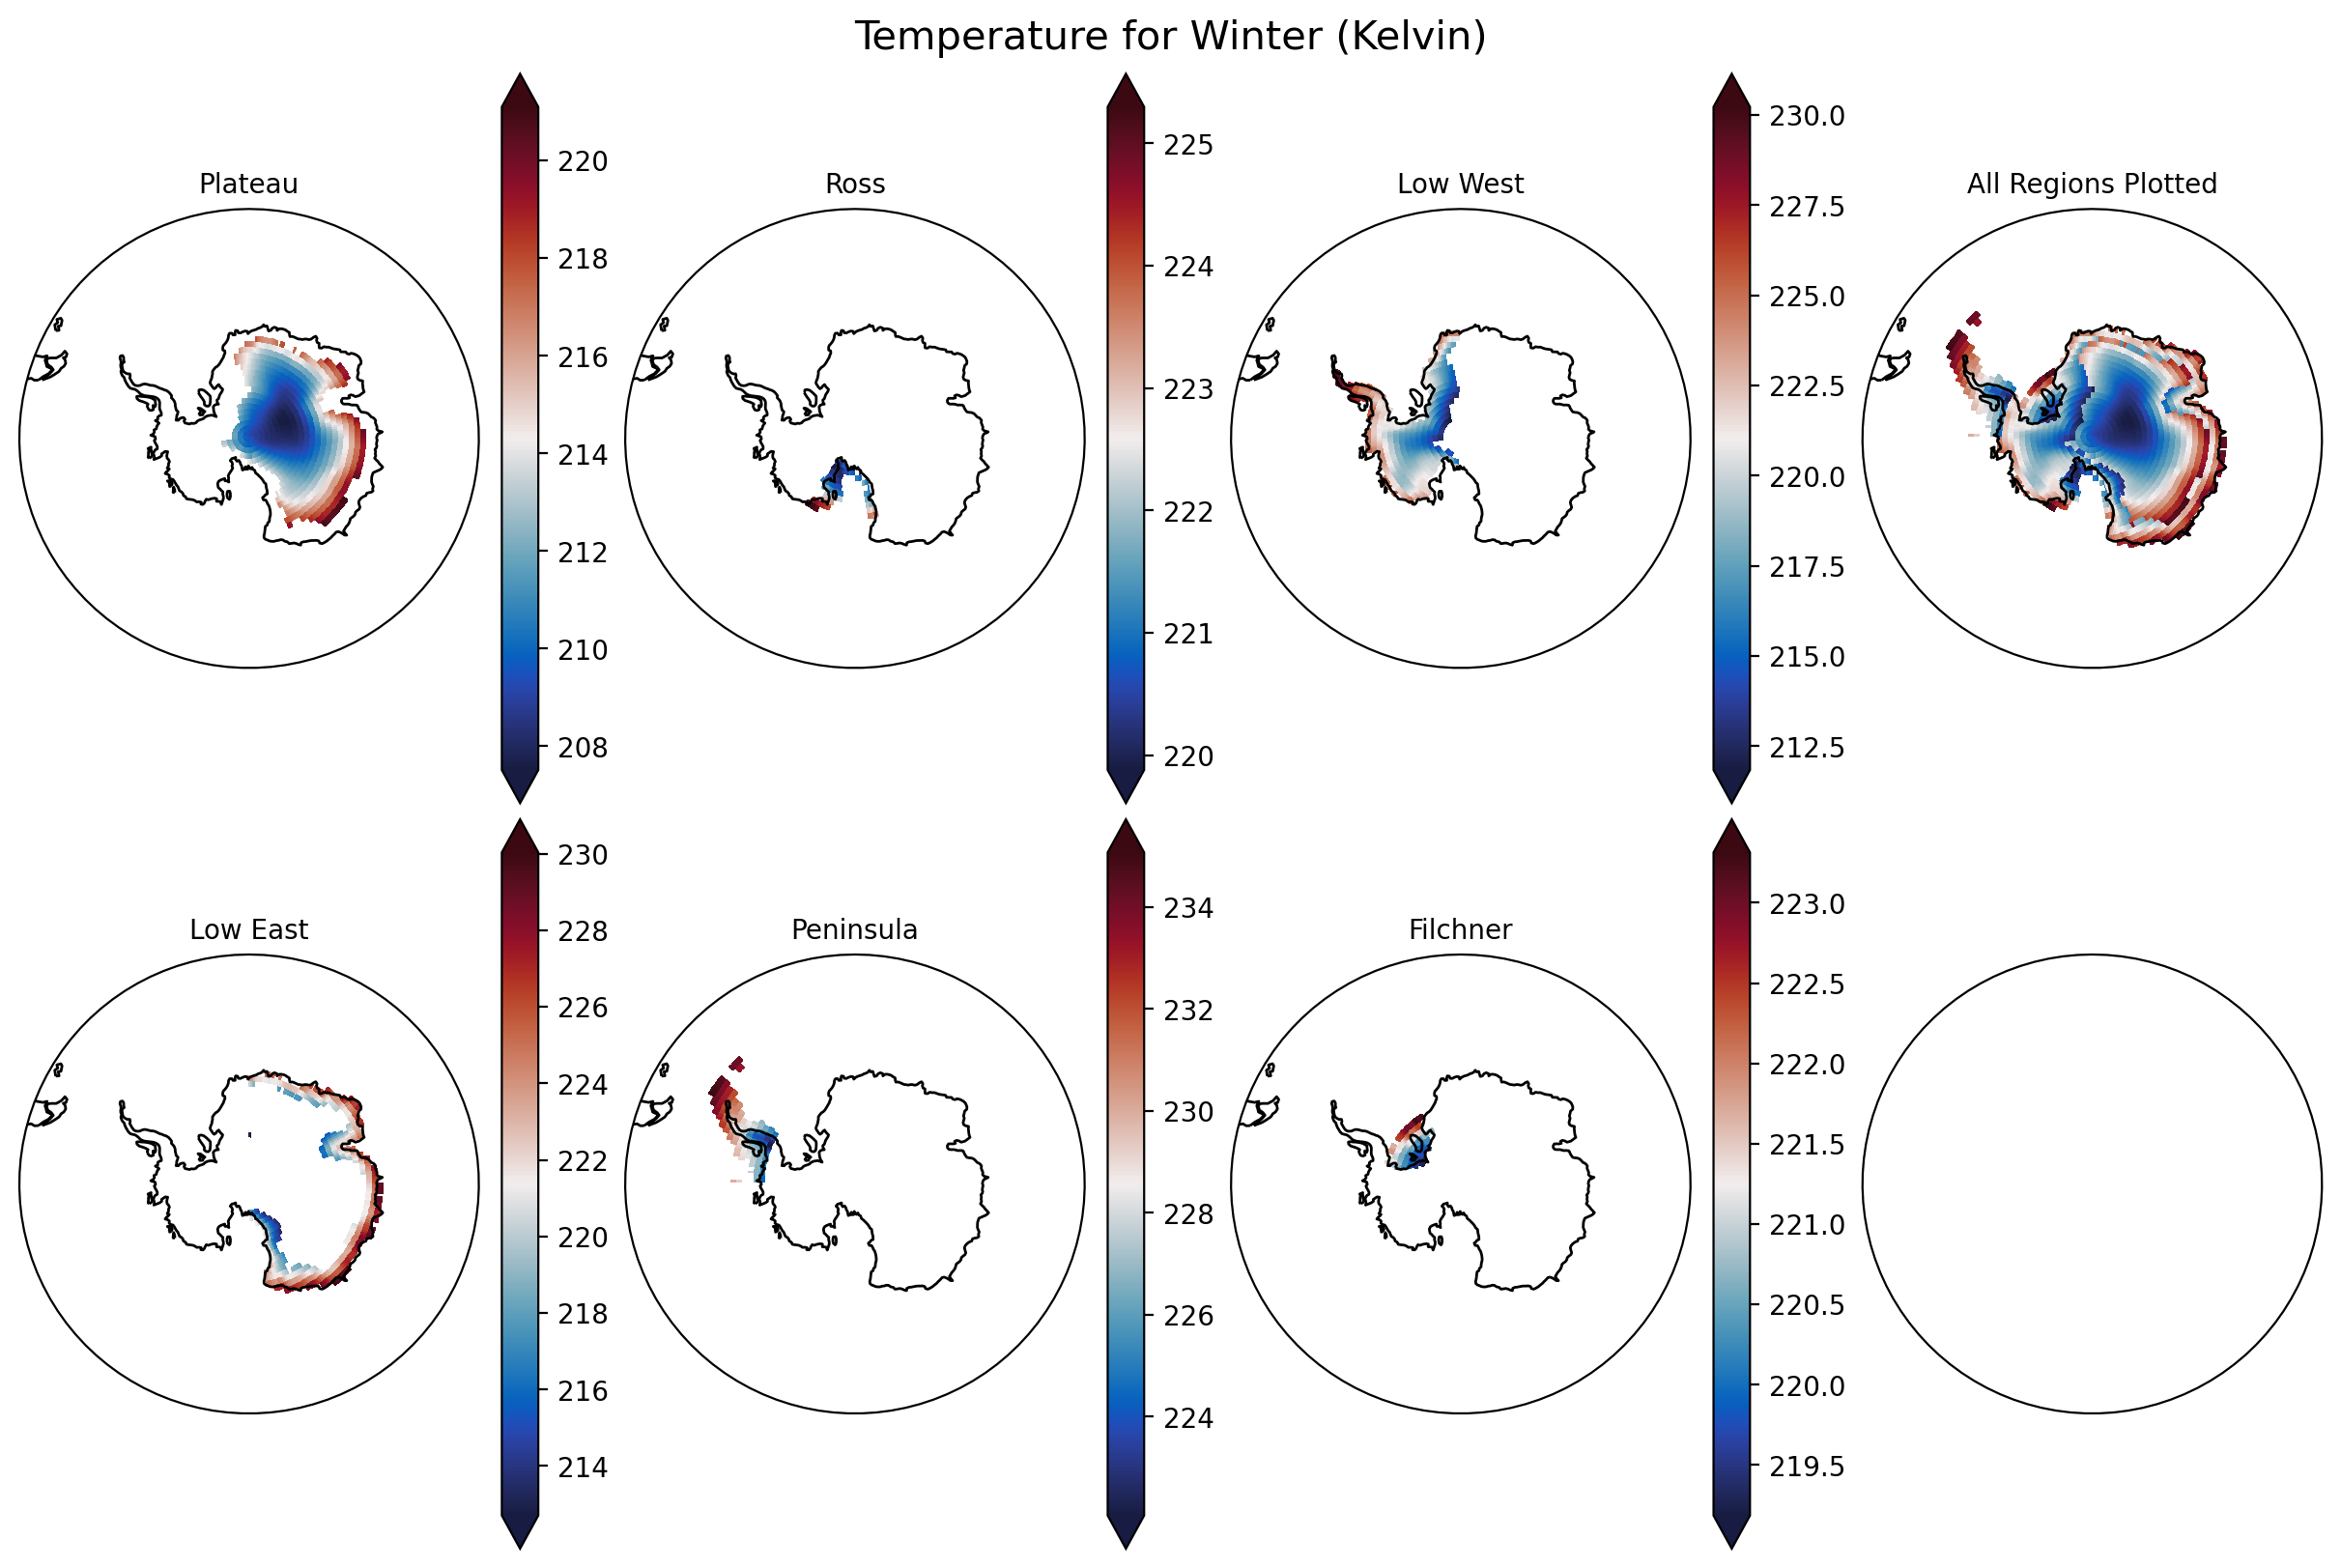

In [18]:
fig, ax = south_pole_map(cols=4, rows=2,fig_size=(12,8))


plateau_temp_winter.plot(ax=ax[0,0],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
    
ross_temp_winter.plot(ax=ax[0,1],
              transform =ccrs.PlateCarree(),
             
              extend='both',
              cmap=cmocean.cm.balance)
lowwest_temp_winter.plot(ax=ax[0,2],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance)
    
loweast_temp_winter.plot(ax=ax[1,0],
            transform =ccrs.PlateCarree(),
              
               extend='both',
               cmap= cmocean.cm.balance)
peninsula_temp_winter.plot(ax=ax[1,1],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
filchner_temp_winter.plot(ax=ax[1,2],
              transform =ccrs.PlateCarree(),
              
              extend='both',
              cmap=cmocean.cm.balance)
plateau_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               
               extend='both',
               cmap=cmocean.cm.balance, add_colorbar=False)

ross_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)


lowwest_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
              
               cmap=cmocean.cm.balance, add_colorbar=False)

loweast_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)

filchner_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
                
               cmap=cmocean.cm.balance, add_colorbar=False)

peninsula_temp_winter.plot(ax=ax[0,3],
               transform =ccrs.PlateCarree(),
               extend='both',
               
               cmap=cmocean.cm.balance, add_colorbar=False)



ax[0,0].coastlines()
ax[0,1].coastlines()
ax[0,2].coastlines()
ax[1,0].coastlines()
ax[1,1].coastlines()
ax[1,2].coastlines()
ax[0,3].coastlines()

ax[0,0].set_title('Plateau',size=10)
ax[0,1].set_title('Ross',size=10)
ax[0,2].set_title('Low West',size=10)
ax[1,0].set_title('Low East',size=10)
ax[1,1].set_title('Peninsula',size=10)
ax[1,2].set_title('Filchner',size=10)
ax[0,3].set_title('All Regions Plotted',size=10)


fig.suptitle('Temperature for Winter (Kelvin)', fontsize=15)